In [176]:
# Iván Andrés Trujillo abella
# ivantrujillo1229@gmail.com

In [177]:
url <- "https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/ANOVA2.csv"

# Supuestos
1) Normailidad de los residuos

2) Homocedasticidad en cada uno de los tratamientos

3) independendica de las observaciones

In [178]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [179]:
library(car)

In [180]:
df <- read.csv(url)


	Shapiro-Wilk normality test

data:  residuos
W = 0.98919, p-value = 0.6929



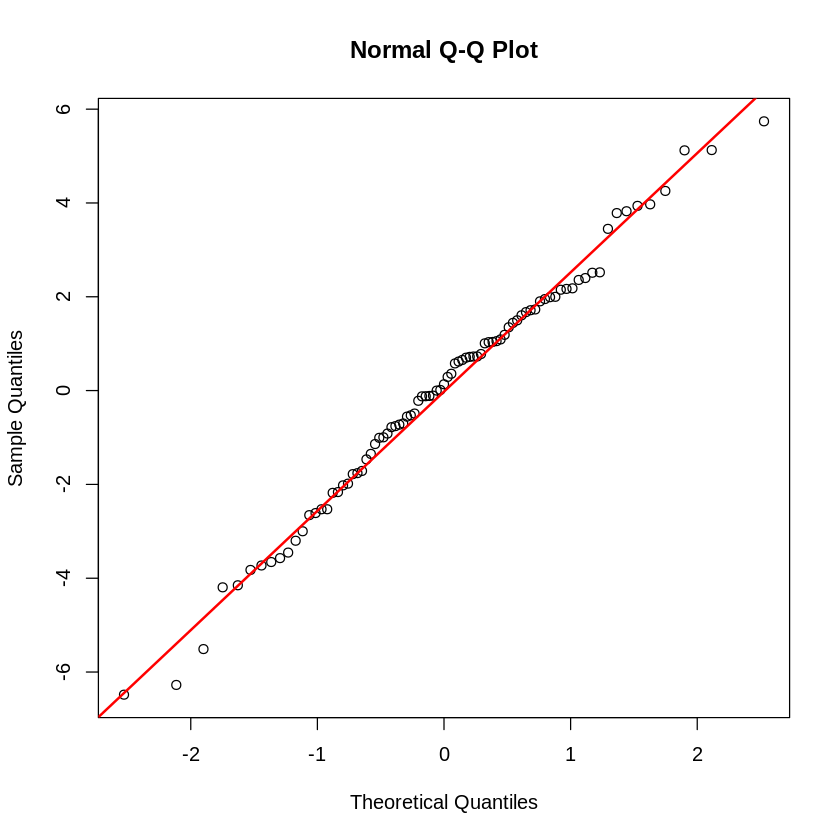

In [181]:
modelo <- aov(wage ~ undergraduate * sector * experience, data = df) # efectos principales e interacciones
residuos <- residuals(modelo)
print(shapiro.test(residuos))
qqnorm(residuos)
qqline(residuos, col = "red", lwd = 2)
# in thi case normality is check! why?

In [182]:
df$undergraduate <- as.factor(df$undergraduate)
df$sector <- as.factor(df$sector)
df$experience <- as.factor(df$experience)

In [183]:
# Levene para cada factor individualmente
leveneTest(wage ~ sector, data = df)
leveneTest(wage ~ experience, data = df)
leveneTest(wage ~ undergraduate, data = df)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.03569436,0.9649498
,84,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,2.087824,0.1303425
,84,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,1.671133,0.194224
,84,NA,NA


In [184]:
df$Group <- interaction(df$undergraduate, df$sector, df$experience)

In [185]:
leveneTest(wage ~ Group, data = df)
# P < 0.05  (reject Ho)  heterokcedasticity
# othersise: homocedasticity.
# está el test de brown!!!

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,26,0.4719635,0.9812202
,60,NA,NA


In [186]:
modelo <- aov(wage ~ undergraduate * sector * experience, data = df)
summary(modelo)

                                Df Sum Sq Mean Sq F value   Pr(>F)    
undergraduate                    2  16162    8081 874.450  < 2e-16 ***
sector                           2   3664    1832 198.235  < 2e-16 ***
experience                       2    374     187  20.215 1.94e-07 ***
undergraduate:sector             4     40      10   1.089   0.3700    
undergraduate:experience         4     11       3   0.306   0.8730    
sector:experience                4     13       3   0.364   0.8332    
undergraduate:sector:experience  8    148      18   2.001   0.0616 .  
Residuals                       60    554       9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [187]:
modelo <- aov(wage ~ undergraduate  + sector + experience  , data = df)
summary(modelo)

              Df Sum Sq Mean Sq F value   Pr(>F)    
undergraduate  2  16162    8081  842.37  < 2e-16 ***
sector         2   3664    1832  190.96  < 2e-16 ***
experience     2    374     187   19.47 1.29e-07 ***
Residuals     80    767      10                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [188]:
modelo <- aov(wage ~ undergraduate  + sector + experience  , data = df)
summary(modelo)
tukey_result <- TukeyHSD(modelo)
tukey_result

              Df Sum Sq Mean Sq F value   Pr(>F)    
undergraduate  2  16162    8081  842.37  < 2e-16 ***
sector         2   3664    1832  190.96  < 2e-16 ***
experience     2    374     187   19.47 1.29e-07 ***
Residuals     80    767      10                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = wage ~ undergraduate + sector + experience, data = df)

$undergraduate
                   diff       lwr       upr p adj
law-economics  -9.66654 -11.65198 -7.681099     0
math-economics 23.89593  22.03856 25.753299     0
math-law       33.56247  31.49719 35.627755     0

$sector
                        diff       lwr       upr p adj
industry-financial -7.296978 -9.166681 -5.427275     0
tech-financial      9.313745  7.341732 11.285758     0
tech-industry      16.610723 14.569577 18.651870     0

$experience
                   diff       lwr      upr     p adj
mid-entry    -0.1133529 -2.075519 1.848813 0.9895634
senior-entry  4.2534857  2.343653 6.163318 0.0000028
senior-mid    4.3668385  2.404672 6.329005 0.0000028


In [189]:
#Cual es la configuración óptima?
# matemáticas, tecnología, senior!

In [190]:
# independencia recae más sobre el DOE
durbinWatsonTest(modelo)
# D-W Si este fuera de  (1.5 - 2.5), es posible que no haya independencia
# para este caso se cumple independencia

 lag Autocorrelation D-W Statistic p-value
   1      0.07463551      1.823886   0.388
 Alternative hypothesis: rho != 0